# **Advanced Regression Assignment**

#Ramandeep Mehra
#upGrad and IIITB Machine Learning & AI Program-Dec 2023


#Problem Statement

A US-based housing company named **Surprise Housing** has decided to enter the **Australian** market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.


#Business Goal


Building a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


#Model Objective


* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

* Determining the optimal value of lambda for ridge and lasso regression.



#Below mentioned tasks have performed to build an Advanced Regression Model:

* Importing and understading the data.
* Miising value treatment and outlier analysis
* Exploratory data analysis to find out the inference about the data and its correlation with the target variables.
* Tranformation of the target variable to handle the data skewness.
* Data preprocession like Label encoding and ceration of dummies.
* Test train split and Feature scaling
* Data modelling using RFE to identify the top 30 variables.
* Ridge and Lasso Regression to find the top feature variables and finding the optimal alpha value


#Below mentioned steps have followed to build a Advance Regression Model:

1. Importing Libraries
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis (Data Exploration)
5. Data Preprocessing
6. Data Modeling
7. Inference and Recomendation

#Importing Libraries
Importing the libraries which will be used in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Suppressing warnings

import warnings
warnings.filterwarnings("ignore")

# setting max columns and rows to display

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# set colwidth to display

pd.set_option('display.max_colwidth', 100)

In [2]:
#Loading the dataset for the analysis using pandas library and checking the first 5 Rows
Data = pd.read_csv("train.csv")
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Data Understanding
Checking the shape, null value and statistics measurements

In [3]:
#Checking the shape of the Dataset
Data.shape

(1460, 81)

There are 1460 Rows and 81 Columns in the dataset

In [4]:
# Checking column with large amount of null values(in percentage).
(Data.isnull().sum()/Data.shape[0]*100).round(2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
MasVnrType       59.73
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
Electrical        0.07
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [5]:
#Checking the data type
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking the statistics value of the dataset
Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Missing value treatment
There are missing value in the dataset, hence will handle the missing value to get the inferences accurate.



*   **PoolQC:** Pool Quality Variable has 7 values updated for Excellent, Good,	Average/Typical, Fair, NA	(No Pool). **99.52%** Value have updated as NA (No Pool); these value will not help to predict any inferences; hence will go ahead and drop this variable.

*   **MiscFeature:** Miscellaneous feature has **95.3%** null value and insignificant also, will go ahead and drop this column.

*   **Alley:**  Type of alley has **93.77%** null value; will drop this column as this will not help in building a model.

*   **Fence:** Fence quality has **80.75%** null value; will go ahead and drop this column.

*   **MasVnrType:** Masonry veneer type is updated None for 59.73% data, if we replace the value with the mode value it will not help in getting the inferences. Hence will go ahead and delete this column.






In [7]:
Data.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType"],axis=1,inplace=True)

###Checking other variables and handling the null values

In [8]:
Data["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [9]:
Data["FireplaceQu"].isnull().sum()

690



*   **FireplaceQu:** This column has **47.26%** missing value, moreover, this variable will be explained by the **Fireplaces**. Hence will drop this column.
*   ID is insignificant with the price  hence dropping it.



In [10]:
Data.drop(["FireplaceQu","Id"],axis=1,inplace=True)

In [11]:
# finding the mean, median and mode for "LotFrontage"

print("Mean of LotFrontage:", Data["LotFrontage"].mean())
print("Median of LotFrontage:", Data["LotFrontage"].median())
print("Mode of LotFrontage:", Data["LotFrontage"].mode()[0])


Mean of LotFrontage: 70.04995836802665
Median of LotFrontage: 69.0
Mode of LotFrontage: 60.0


In [12]:
# replacing missing of LotFrontage with median.

Data["LotFrontage"] = Data["LotFrontage"].fillna(Data["LotFrontage"].median())

In [13]:
(Data.isnull().sum()/Data.shape[0]*100).round(2).sort_values(ascending=False).head(15)

GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
Electrical      0.07
WoodDeckSF      0.00
PavedDrive      0.00
LowQualFinSF    0.00
dtype: float64

In [14]:
# finding the mode value for "GarageType" as it has sting datatype

print("Mode of GarageType:", Data["GarageType"].mode()[0])

Mode of GarageType: Attchd


In [15]:
Data["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [16]:
# replacing missing of GarageType,GarageQual, GarageCond  with No Garage.

Data["GarageType"] = Data["GarageType"].fillna("No Garage")
Data["GarageQual"] = Data["GarageQual"].fillna("No Garage")
Data["GarageCond"] = Data["GarageCond"].fillna("No Garage")
Data["GarageFinish"] = Data["GarageFinish"].fillna("No Garage")


In [17]:
Data["GarageYrBlt"].dtypes

dtype('float64')

In [18]:
# finding the mean, median and mode for "LotFrontage"

print("Mean of GarageYrBlt:", Data["GarageYrBlt"].mean())
print("Median of GarageYrBlt:", Data["GarageYrBlt"].median())
print("Mode of GarageYrBlt:", Data["GarageYrBlt"].mode()[0])

Mean of GarageYrBlt: 1978.5061638868744
Median of GarageYrBlt: 1980.0
Mode of GarageYrBlt: 2005.0


In [19]:
# Converting GarageYrBlt in age to interpret the result and handle the missing value

Data['GarageYrBlt_Age'] = Data['GarageYrBlt'].max() - Data['GarageYrBlt']

In [20]:
# Dropping the value for GarageYrBlt
Data.drop(["GarageYrBlt"],axis=1,inplace=True)

In [21]:
# Replacing the missing value of GarageYrBlt_Age with 0
Data["GarageYrBlt_Age"] = Data["GarageYrBlt_Age"].fillna(0)


In [22]:
Data["BsmtFinType2"] = Data["BsmtFinType2"].fillna("No Basement")
Data["BsmtExposure"] = Data["BsmtExposure"].fillna("No Basement")
Data["BsmtCond"] = Data["BsmtCond"].fillna("No Basement")
Data["BsmtQual"] = Data["BsmtQual"].fillna("No Basement")
Data["BsmtFinType1"] = Data["BsmtFinType1"].fillna("No Basement")

In [23]:
# finding the mean, median and mode for "MasVnrArea" to fill the null value

print("Mean of MasVnrArea:", Data["MasVnrArea"].mean())
print("Median of MasVnrArea:", Data["MasVnrArea"].median())
print("Mode of MasVnrArea:", Data["MasVnrArea"].mode()[0])

Mean of MasVnrArea: 103.68526170798899
Median of MasVnrArea: 0.0
Mode of MasVnrArea: 0.0


In [24]:
# finding the mode value for "MasVnrArea" as it has sting datatype

Data["MasVnrArea"] = Data["MasVnrArea"].fillna(Data["MasVnrArea"].median())

In [25]:
print("Mode of Electrical:", Data["Electrical"].mode()[0])

Mode of Electrical: SBrkr


In [26]:
Data["Electrical"] = Data["Electrical"].fillna(Data["Electrical"].mode()[0])

In [27]:
Data.isnull().sum().sort_values(ascending=False).head(15)

MSSubClass      0
GarageFinish    0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

##### There are no missing values in the data set, will go agead and fix the data tyoe and prepare the data for the modeil building via performing Exploratory Data Analysis

#Data Prepration

In [28]:
Data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

#####Year Sold and Remodel date (same as construction date if no remodeling or additions) are 2 columns with the help of these 2 columns will calculate the age of the building and will drop these columns as we take the Remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [29]:
Data['Age'] = Data['YrSold'] - Data['YearRemodAdd']
Data['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [30]:
#Dropping these columns as these columns are giving the
Data = Data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1)

In [31]:
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,GarageYrBlt_Age,Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,7.0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,34.0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,9.0,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,12.0,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,10.0,8


#Performing Univariate Analysis

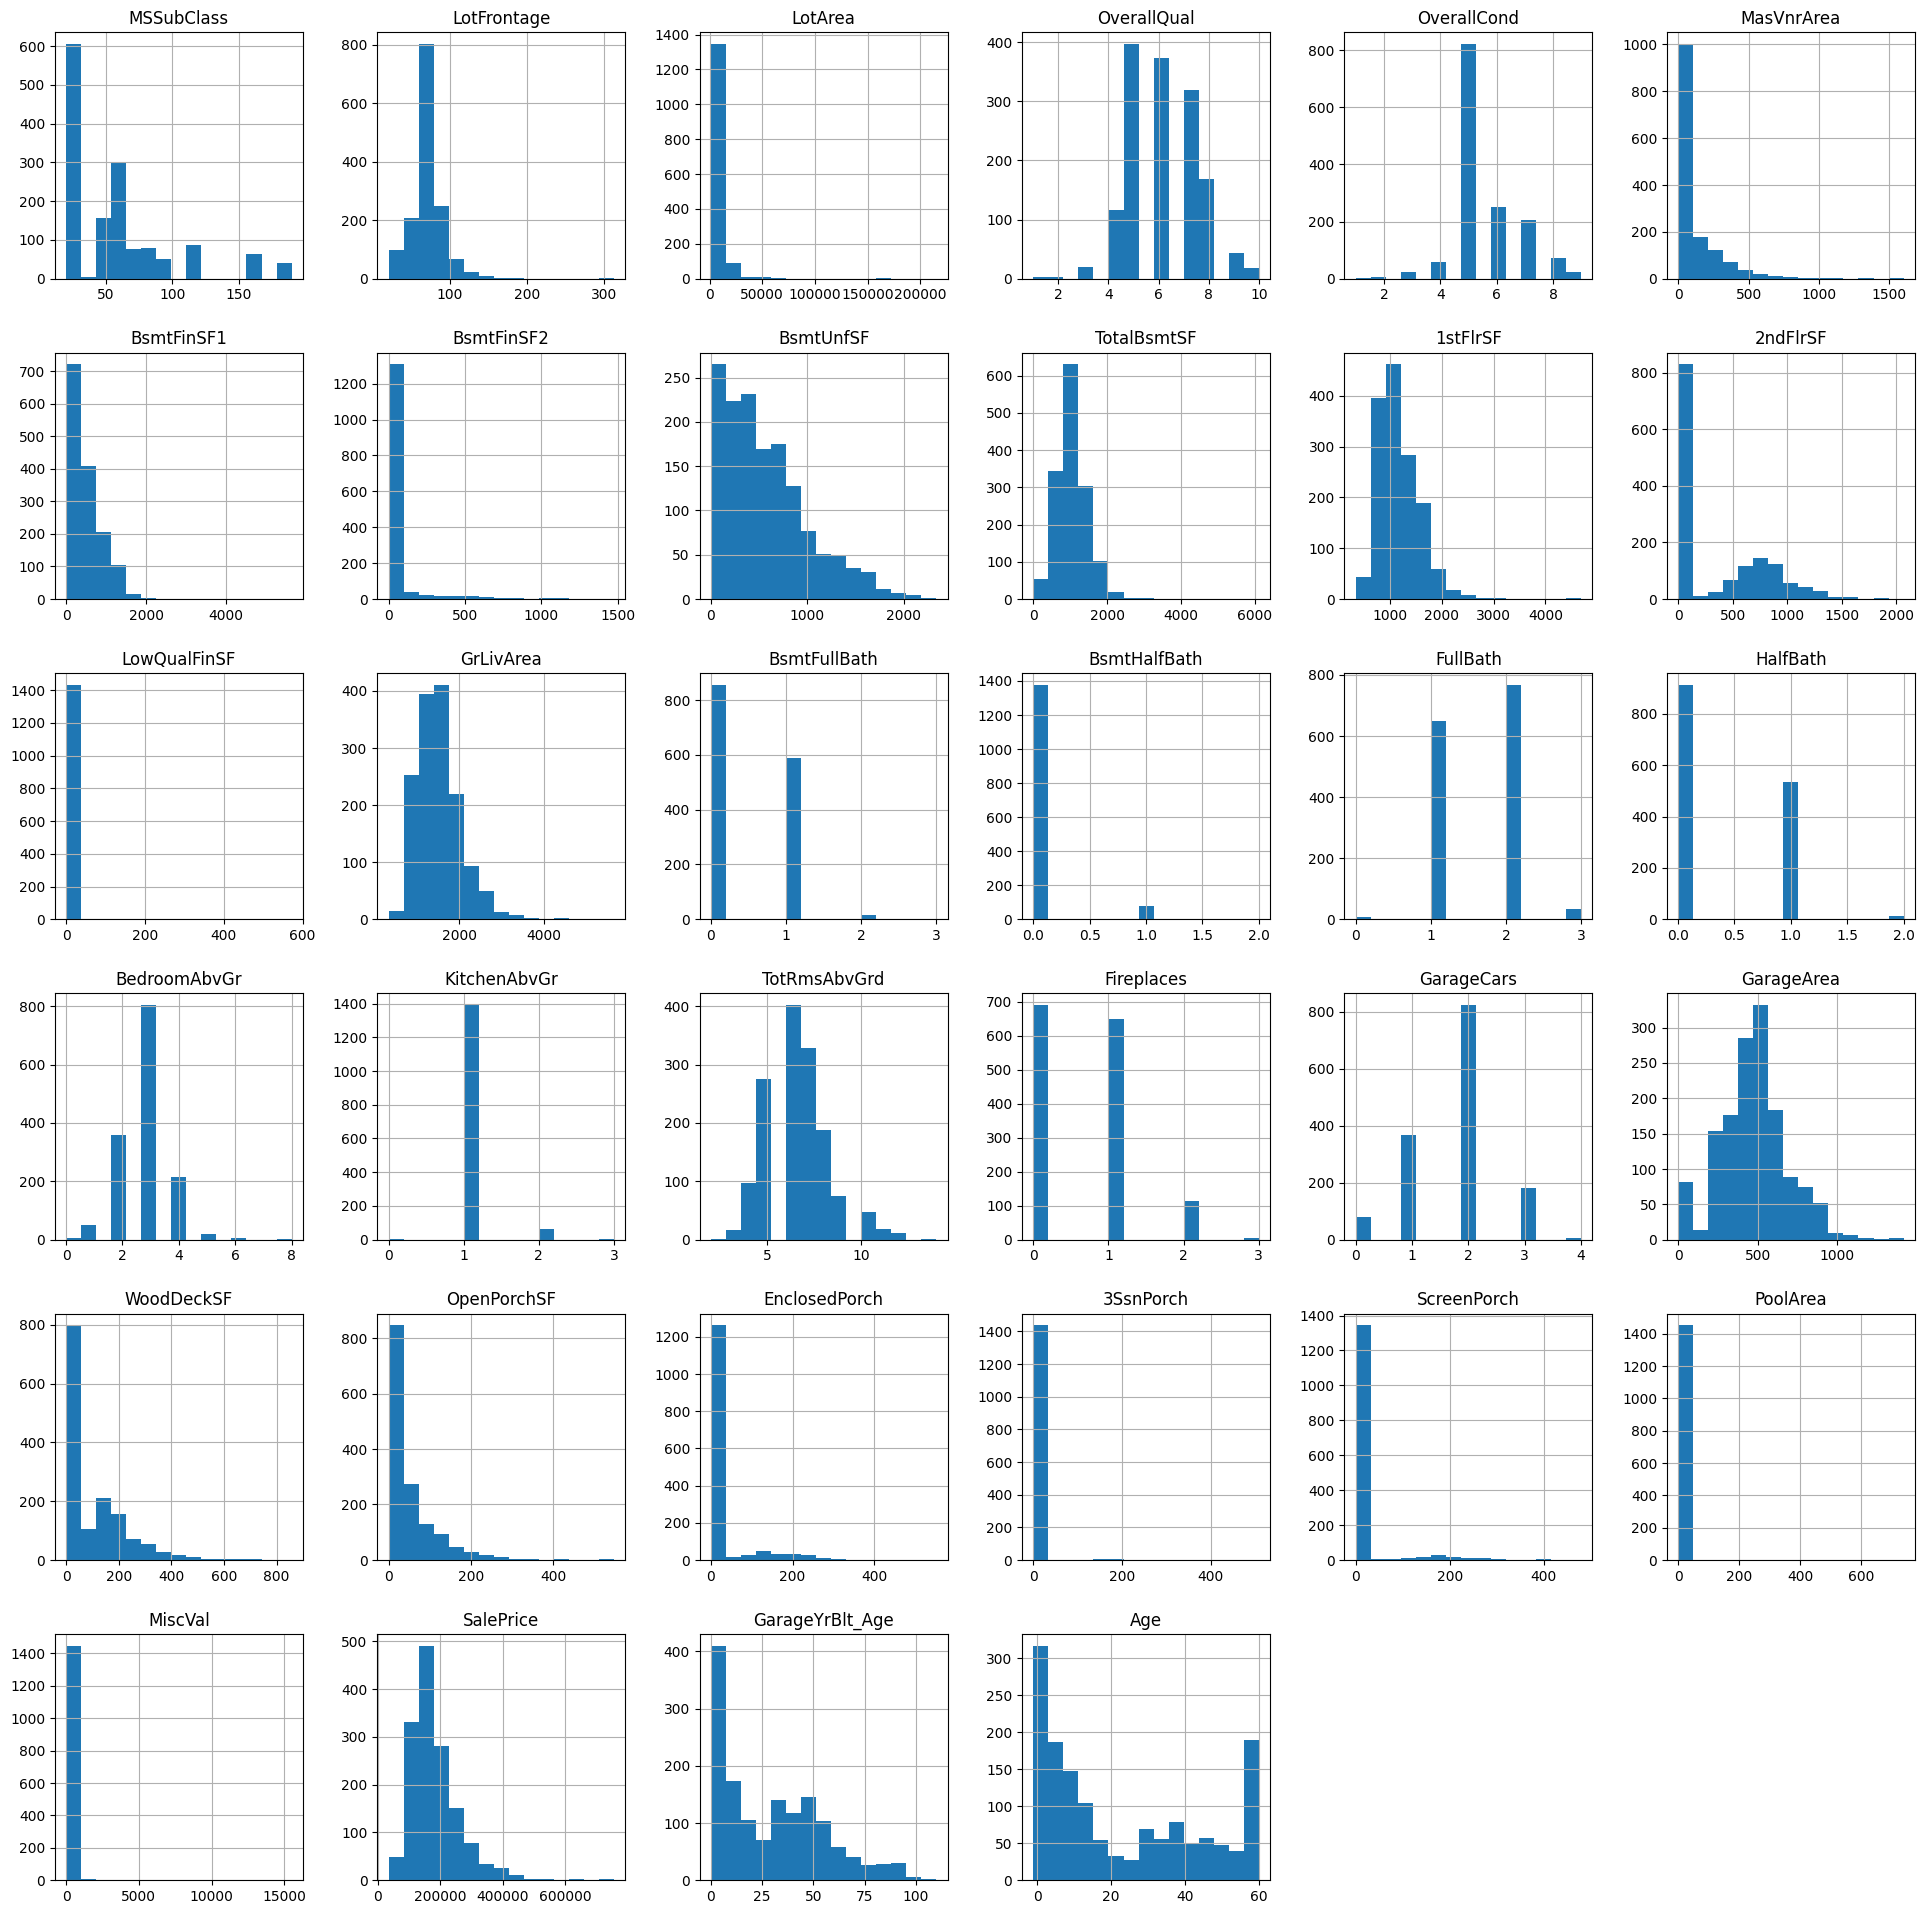

In [32]:
# Getting the numerical data to perform the EDA
numeric_columns = Data.columns[Data.dtypes != "object"]
numeric_data = Data[numeric_columns]

# Plotting histograms for numeric columns
numeric_data.hist(bins=15, figsize=(24, 24))
plt.show()

### Post creating a histogram to check the distribution of the dataset, it has been oberved that most the numerical data is skewed on te right side, will check the correlation of the dataset to check the Multicollinearity.

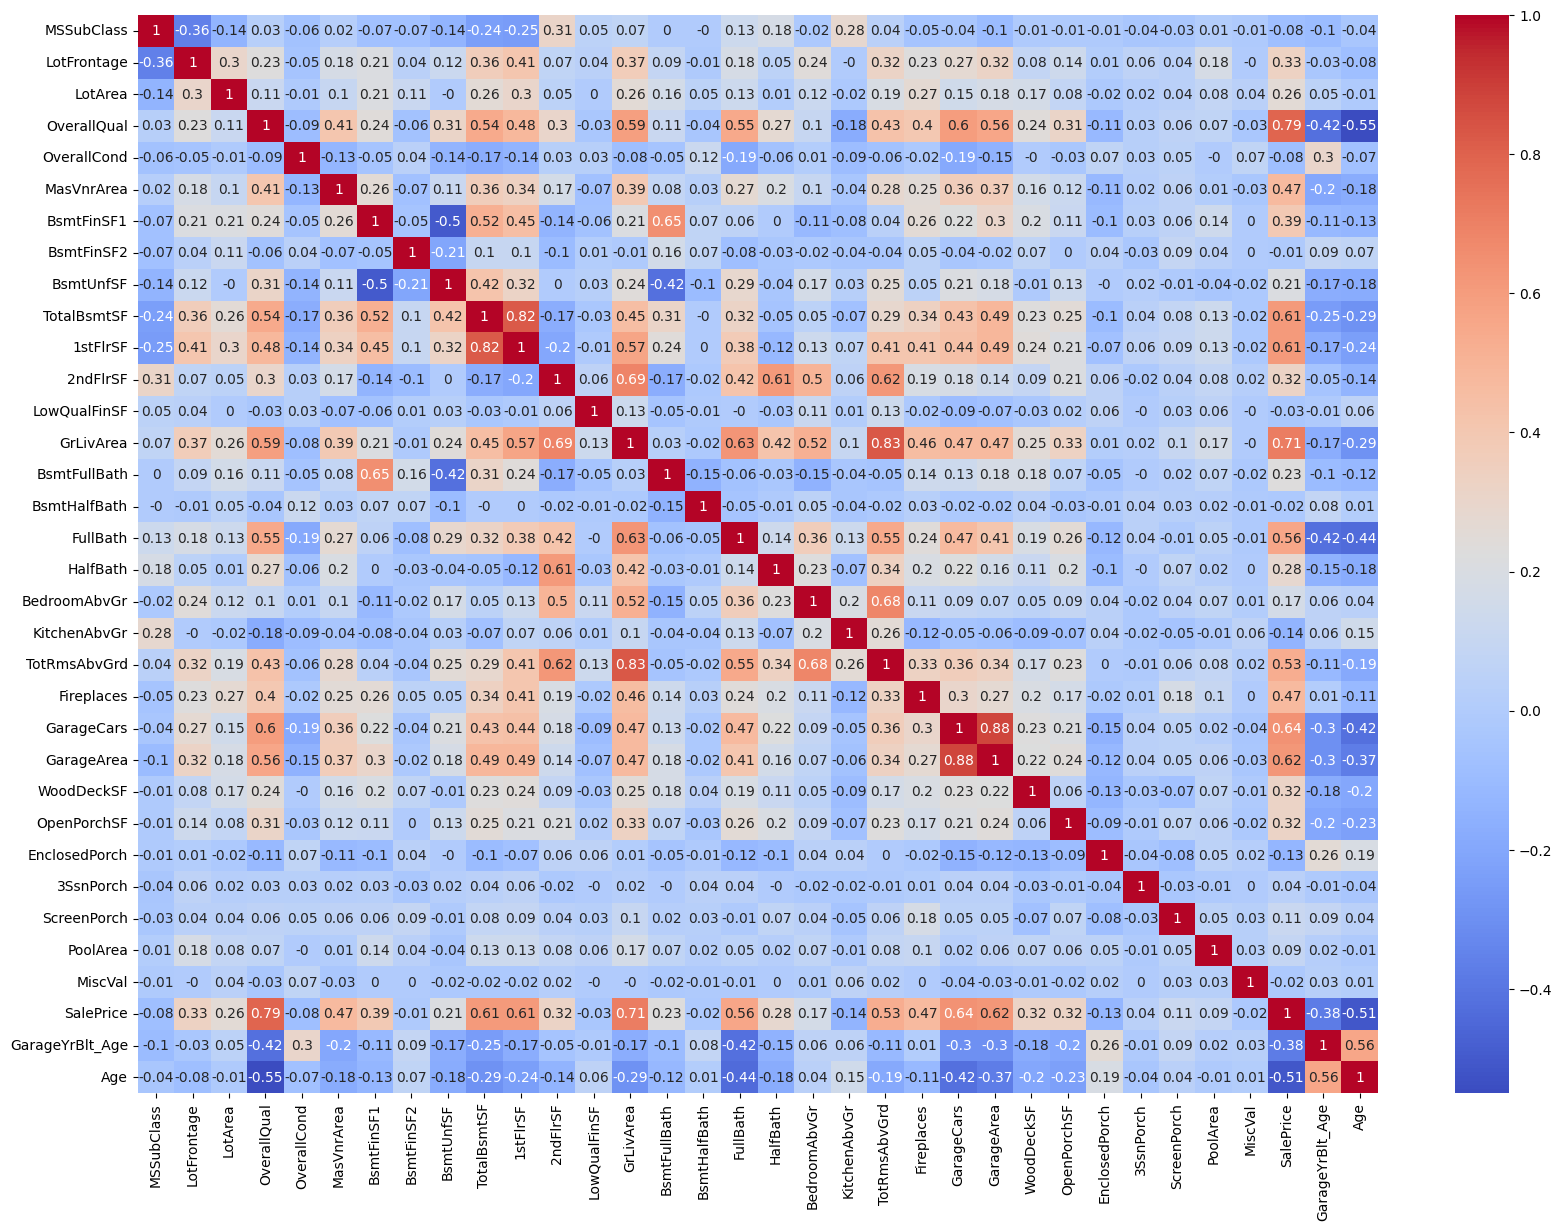

In [33]:
#creating a correlation matrix for numeric_data
plt.figure(figsize=(20, 14))
sns.heatmap(numeric_data.corr().round(2), annot=True, cmap='coolwarm')
plt.show()

Relationship between the dependent and independent variables:

* SalePrice is highly positively correlated to the Overall Quality(0.79)
* SalePrice is highly positively correlated to the GrLivArea (0.71)
* SalePrice is positively correlated to the GarageCars(0.64)
* SalePrice is positively correlated to the GarageAre(0.62)
* SalePrice is positively correlated to the 1stFlrSF (0.61)
* SalePrice is positively correlated to the TotalBsmtSF (0.61)
* SalePrice is positively correlated to the FullBath(0.58)
* SalePrice is positively correlated to the TotRmsAbvGrd(0.55)
* SalePrice is positively correlated to the GarageCars(0.64)
* SalePrice is positively correlated to the GarageAre(0.62)
* SalePrice is negatively correlated to the Age(-0.5)

### GarageCars: Size of garage in car capacity and GarageArea: Size of garage in square feet are positively highly correlated. GarageArea is explained by the GarageCars, hence will drop the GarageCars variable to avoid the multicollinearity.    

In [34]:
Data = Data.drop(['GarageCars'], axis = 1)

### Will Create a pairplot for the top 9 independent variable with the dependent variable of SalePrice to understand the relationship.  

In [35]:
Data_Bivariate = Data[["GrLivArea", "SalePrice", "OverallQual", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "GarageArea", "Age"]]

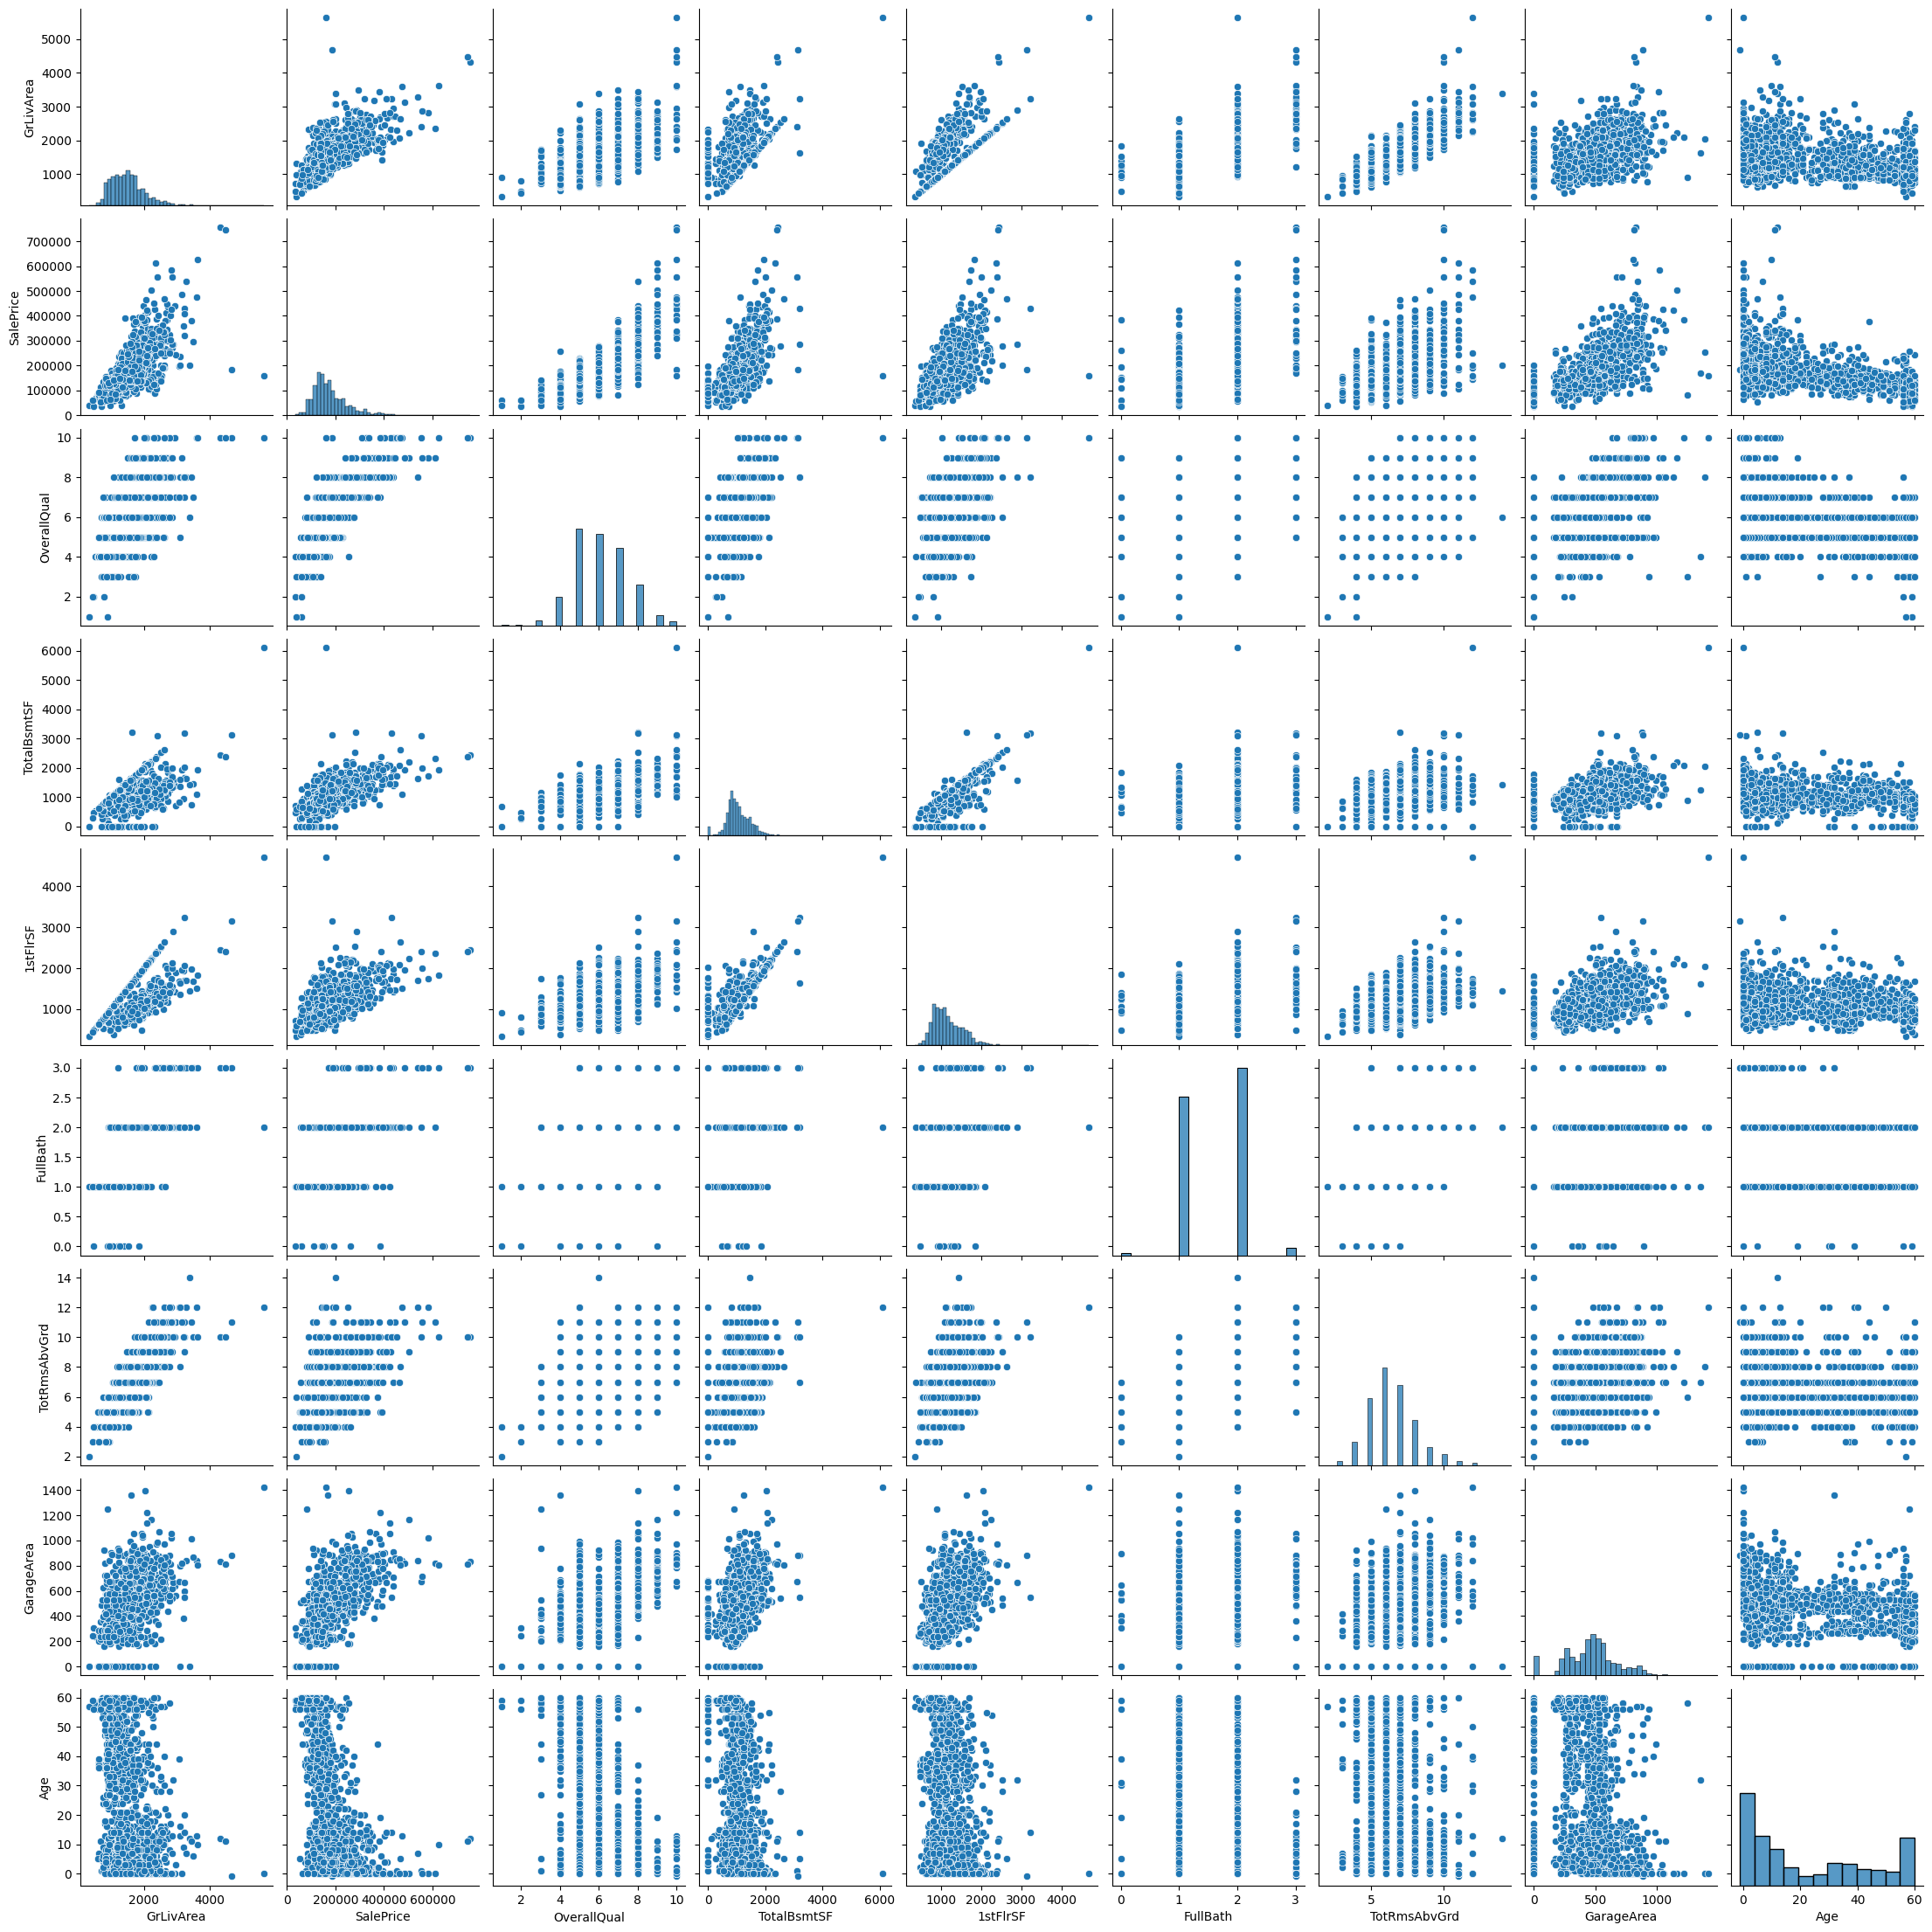

In [36]:
# creating a pairplot for Data_Bivariate

import matplotlib.pyplot as plt
sns.pairplot(Data_Bivariate)
plt.show()


# There is a linear relationship between the dependent and independent variable.

In [37]:
Data_cate  = Data.dtypes[Data.dtypes == "object"].index
Data_cate

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

###**EDA FOR few categorical columns:** Will go ahead and perform the Exploratory Data Analysis for the categorical variable.


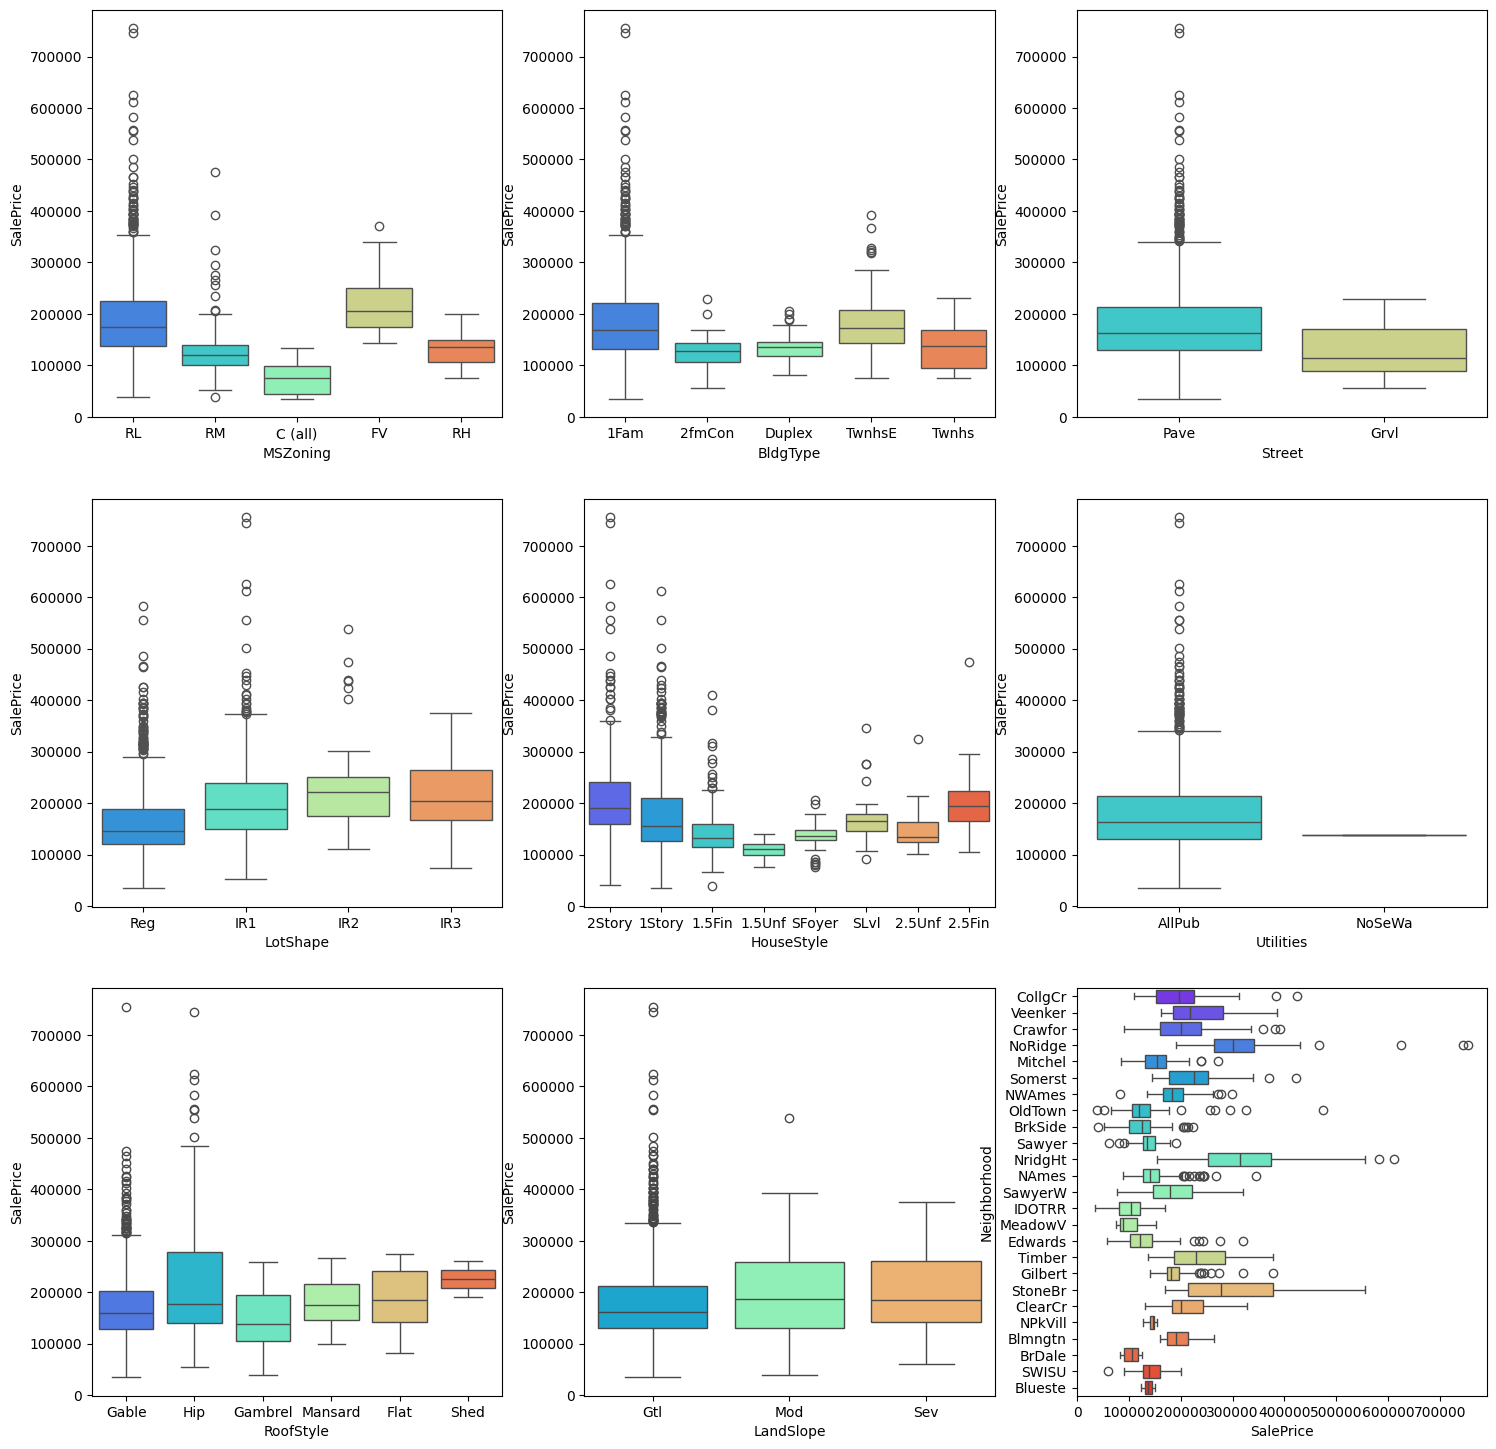

In [38]:
plt.figure(figsize = (18,18))
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,9)
sns.boxplot(y='Neighborhood', x="SalePrice", data=Data,palette='rainbow')
plt.show()

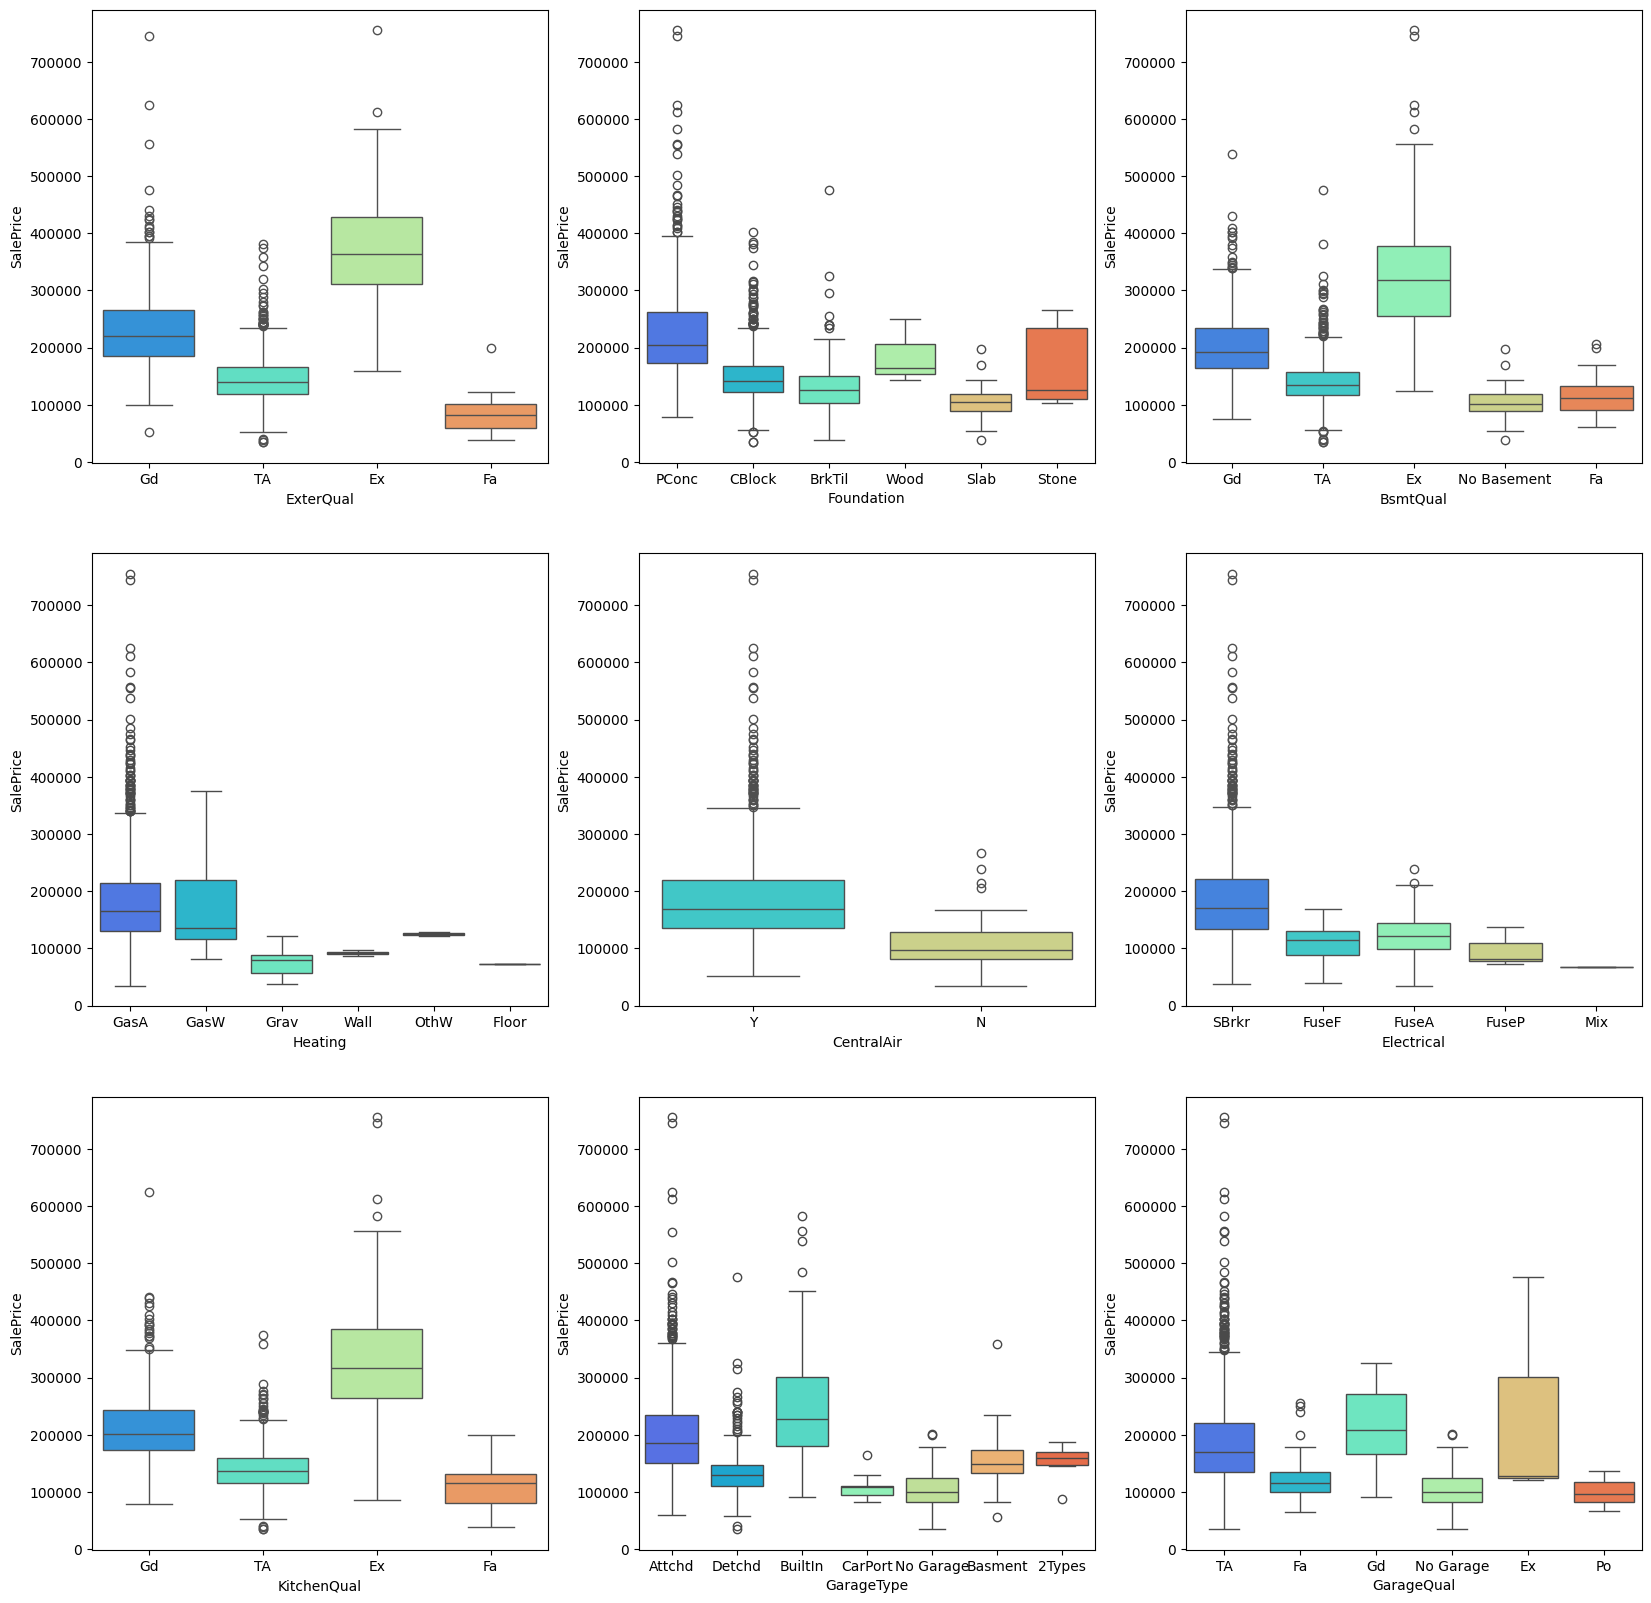

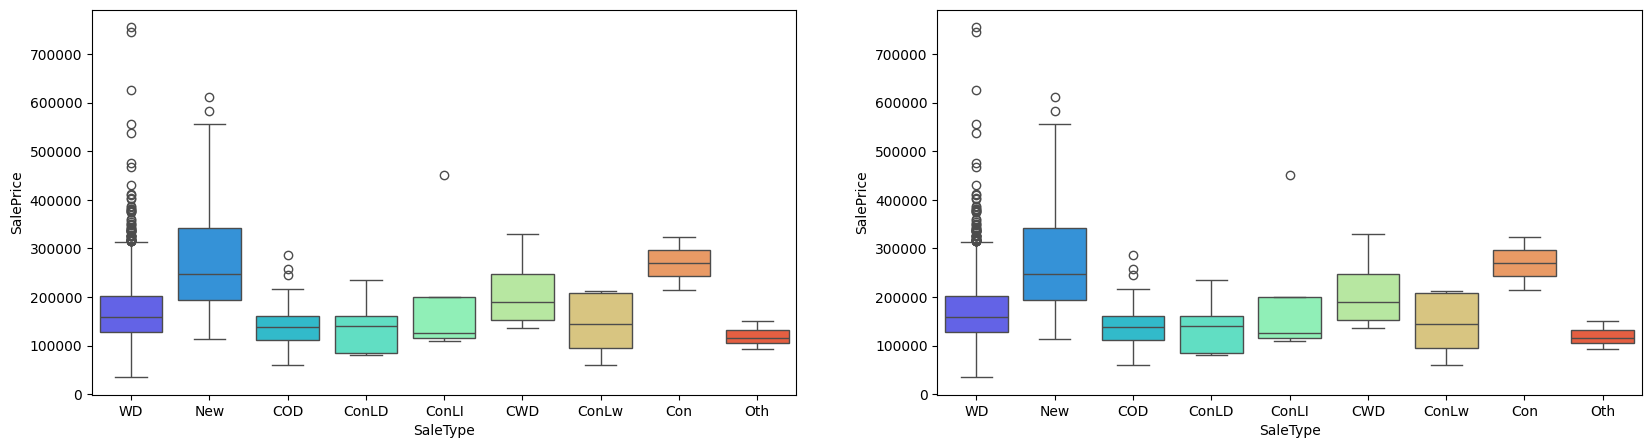

In [39]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=Data,palette='rainbow')
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=Data, palette='rainbow')
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=Data, palette='rainbow')
plt.show()
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=Data,palette='rainbow' )
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=Data,palette='rainbow')
plt.show()

#Summary -

* MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
* The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
* the utlities coulms have most of its values as 'AllPub' So we this column have give much of an informration. - ITs not an important feature.
* The house with Exterior Quality of type Execellent has the highest SalePrice.
* The house with Basement Quality of type Execellent has the highest SalePrice.
* The house with Kitchen Quality of type Execellent has the highest SalePrice.
* The house with Garage Quality of type Execellent has the highest SalePrice.
* The house with Garage Type of type BuiltIn has the highest SalePrice.
* The house with Sale Type of type New has the highest SalePrice.
* The Central air of type 'Yes' has more Sale Price when compared to 'No'


#Data Preprocessing

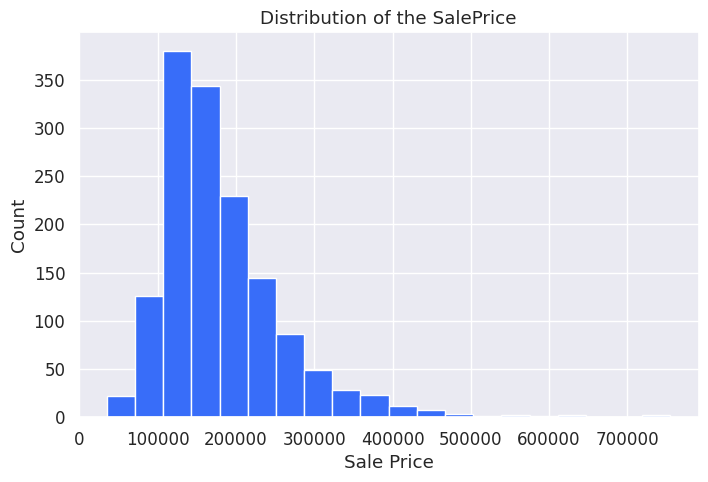

In [40]:
# create a distribution plot for SalesPrice

sns.set(style='darkgrid', palette='rainbow', font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(Data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice")
plt.show()

#Data Preprocessing

In [41]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0,'No Garage':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

Data['ExterQual'] = Data[['ExterQual']].apply(map_function)
Data['ExterCond'] = Data[['ExterCond']].apply(map_function)
Data['BsmtQual'] = Data[['BsmtQual']].apply(map_function)
Data['BsmtCond'] = Data[['BsmtCond']].apply(map_function)
Data['BsmtExposure'] = Data[['BsmtExposure']].apply(map_function1)
Data['BsmtFinType1'] = Data[['BsmtFinType1']].apply(map_function2)
Data['BsmtFinType2'] = Data[['BsmtFinType2']].apply(map_function2)
Data['HeatingQC'] = Data[['HeatingQC']].apply(map_function)
Data['CentralAir'] = Data[['CentralAir']].apply(map_function3)
Data['KitchenQual'] = Data[['KitchenQual']].apply(map_function)
Data['Functional'] = Data[['Functional']].apply(map_function4)
Data['GarageFinish'] = Data[['GarageFinish']].apply(map_function5)
Data['GarageQual'] = Data[['GarageQual']].apply(map_function)
Data['GarageCond'] = Data[['GarageCond']].apply(map_function)
Data['PavedDrive'] = Data[['PavedDrive']].apply(map_function6)

In [42]:
Data.dtypes

MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street              object
LotShape            object
LandContour         object
Utilities           object
LotConfig           object
LandSlope           object
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrArea         float64
ExterQual            int64
ExterCond            int64
Foundation          object
BsmtQual             int64
BsmtCond             int64
BsmtExposure         int64
BsmtFinType1         int64
BsmtFinSF1           int64
BsmtFinType2         int64
BsmtFinSF2           int64
BsmtUnfSF            int64
TotalBsmtSF          int64
Heating             object
HeatingQC            int64
CentralAir           int64
E

# As MSSubClass is a categorical variable but defined under the integer, will go ahead and change the data type.


In [43]:
Data['MSSubClass']=Data['MSSubClass'].astype('object')


In [44]:
Data_cate  = Data.dtypes[Data.dtypes == "object"].index
Data_cate

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
Data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

###Post changing the categorical variable we can see there are no missing value in the data.

#Data Preprocessing

In [46]:
#Creating dummy variable for the prediction

dummy = pd.get_dummies(Data[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True, dtype = int)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,

In [47]:
#Droping the columns whose dummy variables we have created

Data=Data.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [48]:
Data.shape

(1460, 47)

Post creating the dummy variable, will go ahead and create the model for prediction

#Data Modeling

In [49]:
#Splitting the data into 70:30, and setting up the random state as 100 for the same result.
data_train , data_test = train_test_split(Data, train_size=0.7, test_size = 0.3,random_state=100)

### Excluding the target varible from the dataset for model building.


In [50]:
y_train= data_train.pop('SalePrice')
X_train=data_train

In [51]:
y_test=data_test.pop('SalePrice')
X_test=data_test

### Scaling the data via appying the MinMax scaling emthod

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [53]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])


In [54]:
X_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBlt_Age,Age
210,0.157534,0.019306,0.444444,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.500000,0.082920,0.166667,0.0,0.169521,0.141408,0.50,0.0,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.000000,0.967213
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.8,0.75,1.00,1.000000,0.174876,0.166667,0.0,0.154110,0.220458,1.00,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.0,0.333333,0.666667,0.462623,0.6,0.6,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.154545,0.278689
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.6,0.50,0.25,0.333333,0.016655,0.166667,0.0,0.274401,0.120295,0.50,1.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.363636,1.0,0.333333,0.333333,0.155148,0.6,0.6,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.554545,1.000000
986,0.130137,0.017931,0.555556,0.875,0.00,0.333333,0.666667,0.6,0.50,0.25,0.166667,0.000000,0.166667,0.0,0.207620,0.079378,0.75,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.333333,0.179831,0.4,0.6,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,0.065574
1416,0.133562,0.046139,0.333333,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.332620,0.127169,0.75,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.333333,0.727273,1.0,0.000000,0.333333,0.394922,0.6,0.6,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.354545,1.000000


In [55]:
X_train.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBlt_Age,Age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166249,0.042143,0.565676,0.572723,0.065306,0.466210,0.363696,0.695788,0.732125,0.415034,0.598433,0.079337,0.210741,0.033980,0.241388,0.173773,0.787218,0.927522,0.184341,0.165943,0.011649,0.207345,0.146588,0.029873,0.522037,0.188051,0.356881,0.026934,0.503754,0.318315,0.975188,0.199151,0.570356,0.332545,0.560823,0.560431,0.936337,0.107894,0.089690,0.042275,0.007756,0.037559,0.003318,0.003143,0.267794,0.391500
std,0.075615,0.048226,0.155529,0.136506,0.117088,0.190389,0.116470,0.180065,0.144291,0.272636,0.352275,0.082377,0.158338,0.115907,0.192066,0.075145,0.243717,0.259405,0.092132,0.210799,0.093608,0.102232,0.175127,0.120615,0.183997,0.250283,0.102552,0.115084,0.219705,0.145956,0.107883,0.215306,0.299921,0.150018,0.145093,0.145256,0.244271,0.145254,0.126502,0.114501,0.063649,0.136582,0.053278,0.037314,0.227372,0.338007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.027923,0.444444,0.500000,0.000000,0.333333,0.333333,0.600000,0.750000,0.250000,0.166667,0.000000,0.166667,0.000000,0.092466,0.129787,0.500000,1.000000,0.116435,0.000000,0.000000,0.133743,0.000000,0.000000,0.333333,0.000000,0.250000,0.000000,0.333333,0.181818,1.000000,0.000000,0.333333,0.231312,0.600000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063636,0.081967
50%,0.164384,0.037531,0.555556,0.500000,0.000000,0.333333,0.333333,0.800000,0.750000,0.250000,0.666667,0.069454,0.166667,0.000000,0.197774,0.162357,1.000000,1.000000,0.165278,0.000000,0.000000,0.197540,0.000000,0.000000,0.666667,0.000000,0.375000,0.000000,0.333333,0.272727,1.000000,0.333333,0.666667,0.338505,0.600000,0.600000,1.000000,0.000000,0.047801,0.000000,0.000000,0.000000,0.000000,0.000000,0.227273,0.245902
75%,0.195205,0.046943,0.666667,0.625000,0.098750,0.666667,0.333333,0.800000,0.750000,0.750000,1.000000,0.126152,0.166667,0.000000,0.345034,0.215057,1.000000,1.000000,0.243056,0.352058,0.000000,0.255573,0.333333,0.000000,0.666667,0.500000,0.375000,0.000000,0.666667,0.363636,1.000000,0.333333,0.666667,0.406206,0.600000,0.600000,1.000000,0.196033,0.133843,0.000000,0.000000,0.000000,0.000000,0.000000,0.427273,0.688525
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data Modeling - Recursive feature elimination (RFE) Technique

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
#printing the Coefficients and intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.06749970e+04  8.07111478e+04  1.11628608e+05  2.97735623e+04
  4.02148270e+04  3.29976376e+04 -7.82837337e+03  4.69265668e+04
 -4.50979307e+04  2.13012089e+04  1.28852106e+04  1.58744234e+17
 -1.38255325e+04  4.14580087e+16  6.57027872e+16 -1.71851040e+17
  6.55635487e+03  5.04151368e+02 -2.11251225e+17 -1.00980042e+17
 -2.51838845e+16  2.54479485e+17  2.43838679e+04  8.55963150e+03
  1.31798340e+04  5.84280119e+03 -9.13455016e+03 -4.73079945e+04
  3.14216663e+04  2.32978626e+04  3.86248273e+04  1.47522763e+04
  1.00211577e+04  5.80697795e+04  1.67383953e+04 -5.08480924e+04
  4.96715577e+03  1.13369905e+04 -1.57209414e+04 -6.37915882e+03
  1.87904504e+04  9.37897824e+03 -4.45110101e+04  1.71648710e+04
  3.67681335e+03 -1.49549359e+03]
3227449269821734.5


In [58]:
# Running RFE with the output number of the variable equal to 70

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=70)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('CentralAir', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageFinish', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', True, 1),
 ('PavedDrive', True, 1),
 ('WoodDeckSF', True, 1),
 ('Open

In [60]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'GarageYrBlt_Age', 'Age'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]


Index([], dtype='object')

In [62]:
col = X_test.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'GarageYrBlt_Age', 'Age'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]


Index([], dtype='object')

In [64]:
X_test.columns[~rfe.support_]


Index([], dtype='object')

In [65]:
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [66]:
# Building model using statsmodel, for the detailed statistics analysis

X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [67]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [68]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     100.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:32:28   Log-Likelihood:                -12092.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     976   BIC:                         2.450e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.732e+04   1.56e+04     

In [70]:
#Checking VIF value of lm.summary
calculate_VIF(col,X_train)

,Features,VIF
15,TotalBsmtSF,inf
11,BsmtFinSF1,inf
14,BsmtUnfSF,inf
13,BsmtFinSF2,inf
21,GrLivArea,69480.96
18,1stFlrSF,37710.86
19,2ndFlrSF,14804.06
20,LowQualFinSF,111.32
35,GarageCond,15.15
34,GarageQual,14.84


In [71]:
y_train_TRT = lm.predict(X_train_rfe)

In [72]:
np.sqrt(mean_squared_error(y_train, y_train_TRT))

33657.7017222965

Text(0.5, 0, 'Errors')

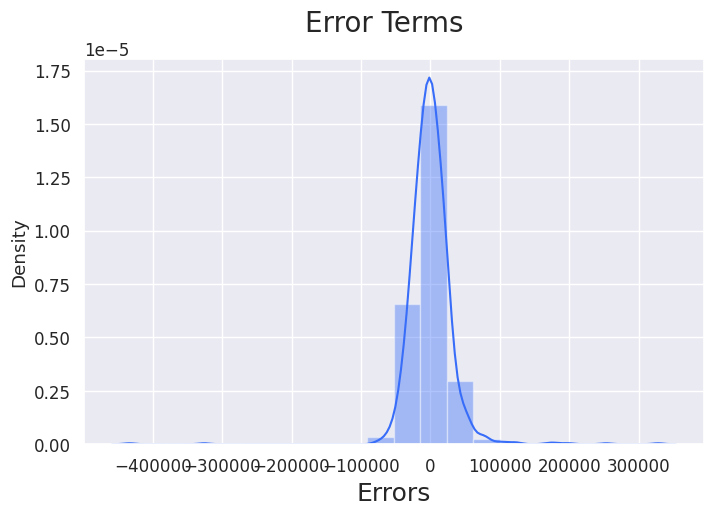

In [73]:
fig = plt.figure()
sns.distplot((y_train - y_train_TRT), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

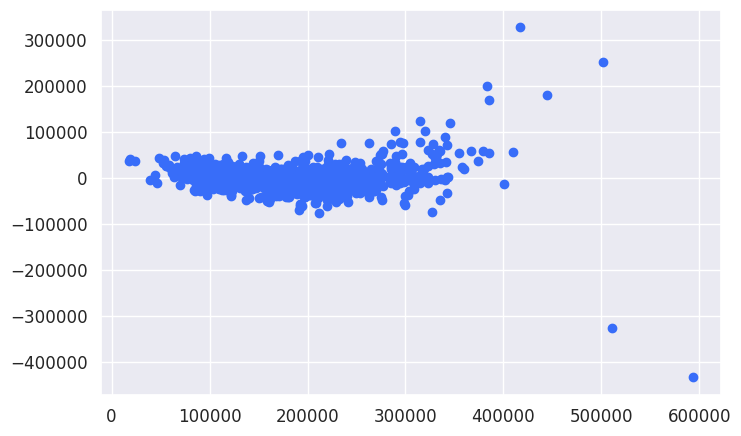

In [74]:
plt.scatter(y_train_TRT,(y_train - y_train_TRT))
plt.show()

In [75]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_train_rfe[X_test_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

# Making predictions using get_prediction() function
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

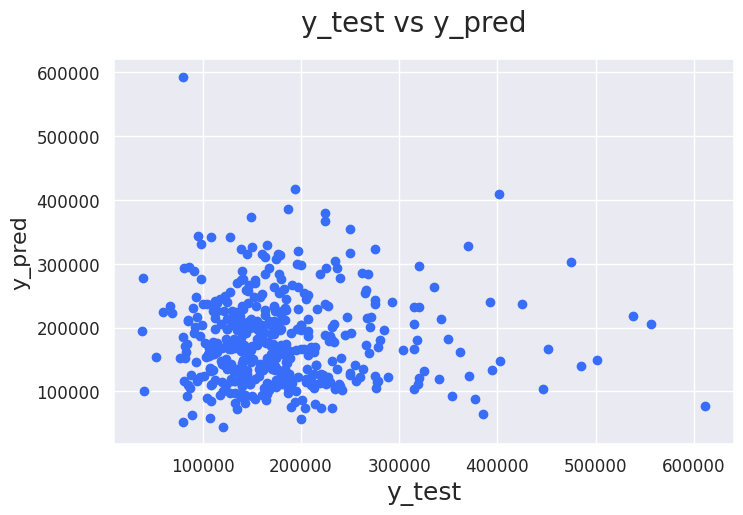

In [76]:
y_pred = y_pred[:len(y_test)]
y_test = np.pad(y_test, (0, len(y_pred) - len(y_test)), 'constant')


# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [77]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

107324.0940114834

In [78]:
R2 = r2_score(y_test, y_pred)
R2

-0.7898547410338175

In [79]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2


-0.8941181240066611

In [80]:

summary_final_model = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[0.819,0.811,33657.7],
                         "Test Set":[-0.789,-0.894,107324.09]})
print(summary_final_model)

  Model Performance Metrics  Train Set    Test Set
0           R-Squared Value      0.819      -0.789
1  Adjusted R-Squared Value      0.811      -0.894
2                      RMSE  33657.700  107324.090


### The Linear regression model we have built with 70 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 81.9% and the columns has VIF value of infinite which shows multicollinerity. Although the R-Squared Value and Adjusted R-Squared value of the test set has been decreased. Hence will go ahead and apply the Lasso and Ridge regression technique to find the optimal value of alpha and interpret the results.


In [81]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [82]:
X_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBlt_Age,Age
210,0.157534,0.019306,0.444444,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.500000,0.082920,0.166667,0.0,0.169521,0.141408,0.50,0.0,0.113889,0.000000,0.0,0.081860,0.333333,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.0,0.000000,0.967213
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.8,0.75,1.00,1.000000,0.174876,0.166667,0.0,0.154110,0.220458,1.00,1.0,0.231481,0.616949,0.0,0.424289,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.0,0.333333,0.666667,0.462623,0.6,0.6,1.0,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.0,0.154545,0.278689
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.6,0.50,0.25,0.333333,0.016655,0.166667,0.0,0.274401,0.120295,0.50,1.0,0.098611,0.333656,0.0,0.201576,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.363636,1.0,0.333333,0.333333,0.155148,0.6,0.6,1.0,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.0,0.554545,1.000000
986,0.130137,0.017931,0.555556,0.875,0.00,0.333333,0.666667,0.6,0.50,0.25,0.166667,0.000000,0.166667,0.0,0.207620,0.079378,0.75,1.0,0.145602,0.307022,0.0,0.230015,0.000000,0.0,0.333333,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.333333,0.179831,0.4,0.6,1.0,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,0.065574
1416,0.133562,0.046139,0.333333,0.625,0.00,0.333333,0.333333,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.332620,0.127169,0.75,1.0,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.5,0.333333,0.727273,1.0,0.000000,0.333333,0.394922,0.6,0.6,0.0,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.0,0.354545,1.000000


#Data Modeling - Advanced Regression


Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.



#Starting with Ridge Regression model

Performing Cross score validation and using different values of alpha and finding the optimal paramater



In [83]:
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009129,0.001418,0.005795,0.002457,0.001,{'alpha': 0.001},-19950.815043,-24976.895655,-21368.060196,-20039.899407,-21961.097665,-21659.353593,1828.864265,4,-21104.089275,-17649.095924,-20020.884846,-20905.912605,-20183.206983,-19972.637926,1232.614969
1,0.008277,0.000102,0.005306,0.001835,0.01,{'alpha': 0.01},-19945.786728,-24973.601461,-21356.877220,-20033.852259,-21957.493917,-21653.522317,1829.918824,3,-21100.694372,-17651.988240,-20017.332460,-20903.556757,-20181.550559,-19971.024478,1230.460504
2,0.008244,0.000131,0.005413,0.001920,0.5,{'alpha': 0.5},-19726.929303,-24893.616004,-21063.999955,-19812.325450,-21859.751741,-21471.324491,1888.071005,2,-21038.865420,-17842.907897,-19962.679108,-20867.947516,-20186.324198,-19979.744828,1141.900065
3,0.010922,0.005082,0.005493,0.002081,1.0,{'alpha': 1.0},-19607.704627,-24937.677549,-20987.598486,-19710.899080,-21831.362716,-21415.048491,1946.050543,1,-21069.405408,-18008.388024,-20021.391508,-20941.041120,-20264.372955,-20060.919803,1099.772624
4,0.008224,0.000140,0.008069,0.006493,10.0,{'alpha': 10.0},-20355.474507,-26228.471560,-22053.773384,-20082.775440,-22902.009354,-22324.500849,2215.860749,5,-22345.854201,-19983.102830,-21625.426275,-22431.502594,-21723.965480,-21621.970276,880.414900
5,0.008495,0.000202,0.004522,0.000110,50,{'alpha': 50},-23351.989694,-28986.599672,-25769.342374,-21886.103651,-26023.622728,-25203.531624,2438.763250,6,-25421.042904,-23712.230765,-24725.217458,-25608.854727,-25133.951405,-24920.259452,673.496319
6,0.009537,0.002219,0.004566,0.000285,100,{'alpha': 100},-26736.490559,-31992.621428,-28714.842249,-24322.525579,-29170.686194,-28187.433202,2559.966784,7,-28353.866710,-26909.717883,-27792.054400,-28647.957609,-28208.650653,-27982.449451,603.162029
7,0.009276,0.000410,0.005059,0.000314,500,{'alpha': 500},-41115.897350,-45036.480911,-40494.076345,-37623.030570,-44018.750251,-41657.647085,2642.606526,8,-41977.675351,-40471.426806,-41748.325817,-42058.373330,-41533.751969,-41557.910654,573.402829
8,0.009011,0.000294,0.004737,0.000323,1000,{'alpha': 1000},-47373.194964,-50632.348647,-45901.605106,-43822.812066,-49977.125072,-47541.417171,2531.080268,9,-47866.996850,-46364.363014,-47783.999384,-47946.446709,-47331.802100,-47458.721611,587.213653


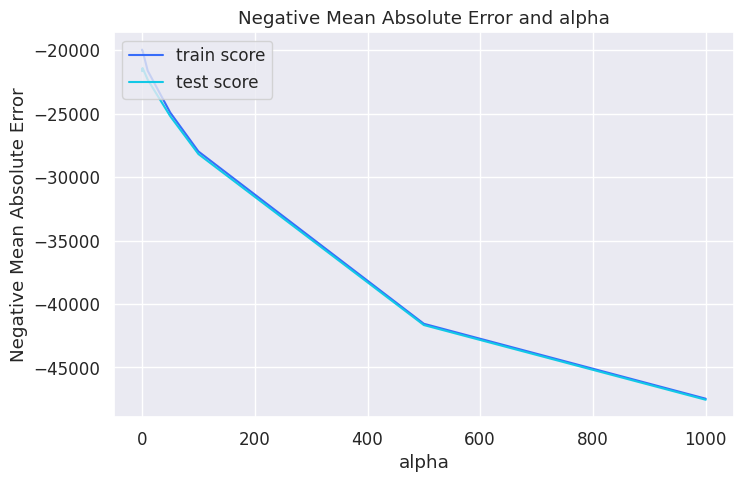

In [85]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We se that alpha is somewhere between 0- 20 So selecting parameters according to that.



In [86]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009493,0.001240,0.004595,0.000101,0.001,{'alpha': 0.001},-19950.815043,-24976.895655,-21368.060196,-20039.899407,-21961.097665,-21659.353593,1828.864265,5,-21104.089275,-17649.095924,-20020.884846,-20905.912605,-20183.206983,-19972.637926,1232.614969
1,0.011178,0.003421,0.004599,0.000160,0.01,{'alpha': 0.01},-19945.786728,-24973.601461,-21356.877220,-20033.852259,-21957.493917,-21653.522317,1829.918824,4,-21100.694372,-17651.988240,-20017.332460,-20903.556757,-20181.550559,-19971.024478,1230.460504
2,0.008834,0.000193,0.004914,0.000406,1.0,{'alpha': 1.0},-19607.704627,-24937.677549,-20987.598486,-19710.899080,-21831.362716,-21415.048491,1946.050543,1,-21069.405408,-18008.388024,-20021.391508,-20941.041120,-20264.372955,-20060.919803,1099.772624
3,0.010067,0.002237,0.004840,0.000295,2.0,{'alpha': 2.0},-19590.613728,-25092.712638,-21005.690204,-19685.991422,-21887.491639,-21452.499926,2011.326817,2,-21193.350569,-18297.874612,-20203.124019,-21131.754787,-20440.316487,-20253.284095,1050.386512
4,0.009944,0.002889,0.006342,0.002742,3.0,{'alpha': 3.0},-19644.013427,-25268.371176,-21058.496342,-19738.477681,-22021.695425,-21546.210810,2059.353431,3,-21330.926486,-18551.468757,-20396.835651,-21312.654519,-20624.973152,-20443.371713,1015.662104
5,0.008922,0.001152,0.004467,0.000086,4.0,{'alpha': 4.0},-19752.799219,-25447.160794,-21158.338101,-19788.675368,-22160.568505,-21661.508397,2096.858588,6,-21476.560972,-18799.967814,-20605.488565,-21494.544105,-20806.570686,-20636.626429,984.345291
6,0.008745,0.000389,0.004529,0.000210,5.0,{'alpha': 5.0},-19845.437614,-25610.200674,-21277.287614,-19820.819922,-22283.595138,-21767.468192,2133.396259,7,-21614.843207,-19019.231254,-20805.145319,-21674.763251,-20982.636793,-20819.323965,962.479415
7,0.008646,0.000237,0.004631,0.000184,6.0,{'alpha': 6.0},-19953.336771,-25761.540245,-21423.360359,-19850.954416,-22396.009590,-21877.040276,2161.950680,8,-21767.589637,-19234.009264,-20988.662098,-21840.964163,-21147.689225,-20995.782877,942.018003
8,0.008668,0.000125,0.004563,0.000150,7.0,{'alpha': 7.0},-20064.116144,-25894.155723,-21573.909281,-19896.353368,-22497.574680,-21985.221839,2180.158992,9,-21918.707332,-19437.101402,-21160.139618,-22000.352948,-21306.424771,-21164.545214,924.288527
9,0.010516,0.004192,0.005884,0.002837,8.0,{'alpha': 8.0},-20165.367521,-26013.476459,-21745.333805,-19959.107684,-22620.959383,-22100.848970,2192.656102,10,-22068.333670,-19632.713062,-21324.572944,-22150.132252,-21454.555989,-21326.061583,907.083520


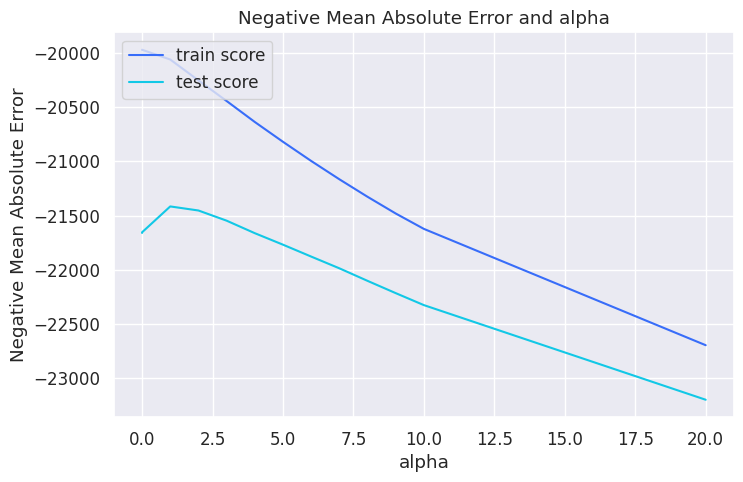

In [88]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2



In [89]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


###Building ridge regression model with optimal alpha value¶


In [90]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [91]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [92]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
3,OverallCond,106002.939206,106002.939206
19,2ndFlrSF,97870.113437,97870.113437
22,BsmtFullBath,92888.078281,92888.078281
0,LotFrontage,-69841.617334,69841.617334
34,GarageQual,56761.400063,56761.400063
2,OverallQual,55981.320161,55981.320161
9,BsmtExposure,-43193.920218,43193.920218
28,KitchenQual,-41174.077080,41174.077080
5,ExterQual,40335.807321,40335.807321
8,BsmtCond,39151.848239,39151.848239


In [93]:
from sklearn import metrics
import sklearn.metrics as skm

In [94]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.8174
Ridge regression test r2:  0.8281


#Lasso Regression model


In [95]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032889,0.013091,0.005103,0.000282,0.0001,{'alpha': 0.0001},-19951.373053,-24977.265681,-21369.316326,-20040.575836,-21961.502539,-21660.006687,1828.747826,26,-21104.470902,-17648.771492,-20021.285101,-20906.177371,-20183.393388,-19972.819651,1232.856945
1,0.058746,0.041673,0.012034,0.004154,0.001,{'alpha': 0.001},-19951.352991,-24977.258859,-21369.303759,-20040.561468,-21961.490543,-21659.993524,1828.751648,25,-21104.461881,-17648.772028,-20021.284346,-20906.167298,-20183.388747,-19972.814860,1232.853397
2,0.045690,0.028098,0.008420,0.001824,0.01,{'alpha': 0.01},-19951.151467,-24977.190628,-21369.178095,-20040.417785,-21961.370611,-21659.861717,1828.790040,24,-21104.371591,-17648.777400,-20021.276796,-20906.066568,-20183.342341,-19972.766939,1232.817900
3,0.024993,0.009486,0.008541,0.002547,0.05,{'alpha': 0.05},-19950.247653,-24976.887361,-21368.211087,-20039.779199,-21960.837491,-21659.192558,1828.975178,23,-21103.969618,-17648.801280,-20020.954166,-20905.618866,-20183.136076,-19972.496001,1232.657732
4,0.028563,0.005374,0.008462,0.002423,0.1,{'alpha': 0.1},-19949.128996,-24976.508247,-21367.104484,-20038.980941,-21960.170490,-21658.378632,1829.201263,22,-21103.468535,-17648.831143,-20020.623487,-20905.059212,-20182.878135,-19972.172102,1232.458337


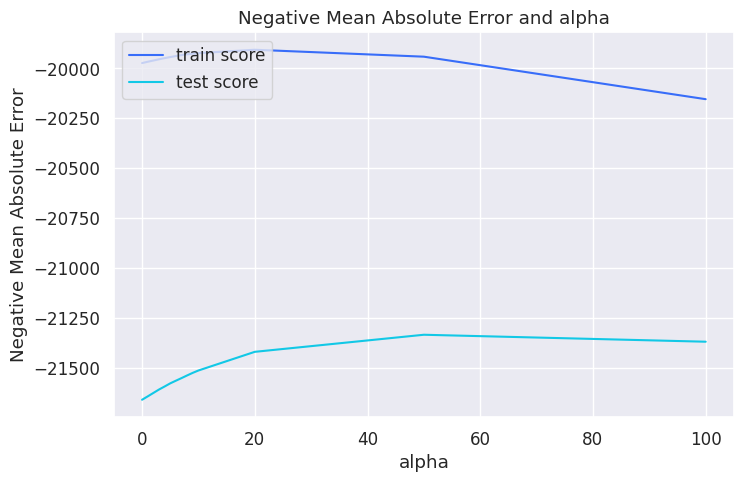

In [97]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graphs shows that alpha value might be less than 1



In [98]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024481,0.014204,0.005017,0.000193,0.001,{'alpha': 0.001},-19951.352991,-24977.258859,-21369.303759,-20040.561468,-21961.490543,-21659.993524,1828.751648,13,-21104.461881,-17648.772028,-20021.284346,-20906.167298,-20183.388747,-19972.814860,1232.853397
1,0.043243,0.029501,0.011749,0.005095,0.01,{'alpha': 0.01},-19951.151467,-24977.190628,-21369.178095,-20040.417785,-21961.370611,-21659.861717,1828.790040,12,-21104.371591,-17648.777400,-20021.276796,-20906.066568,-20183.342341,-19972.766939,1232.817900
2,0.033874,0.015599,0.010589,0.003409,0.05,{'alpha': 0.05},-19950.247653,-24976.887361,-21368.211087,-20039.779199,-21960.837491,-21659.192558,1828.975178,11,-21103.969618,-17648.801280,-20020.954166,-20905.618866,-20183.136076,-19972.496001,1232.657732
3,0.026548,0.003518,0.006419,0.002025,0.1,{'alpha': 0.1},-19949.128996,-24976.508247,-21367.104484,-20038.980941,-21960.170490,-21658.378632,1829.201263,10,-21103.468535,-17648.831143,-20020.623487,-20905.059212,-20182.878135,-19972.172102,1232.458337
4,0.023117,0.008653,0.007938,0.002761,0.2,{'alpha': 0.2},-19946.960637,-24975.750563,-21364.772878,-20037.384507,-21958.837490,-21656.741215,1829.644583,9,-21102.467801,-17648.890637,-20019.901625,-20903.939903,-20182.362450,-19971.512483,1232.059437


In [100]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

###Tunning it more



In [101]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049558,0.019835,0.009319,0.000876,0.0001,{'alpha': 0.0001},-19951.373053,-24977.265681,-21369.316326,-20040.575836,-21961.502539,-21660.006687,1828.747826,5,-21104.470902,-17648.771492,-20021.285101,-20906.177371,-20183.393388,-19972.819651,1232.856945
1,0.037731,0.022965,0.007975,0.002739,0.001,{'alpha': 0.001},-19951.352991,-24977.258859,-21369.303759,-20040.561468,-21961.490543,-21659.993524,1828.751648,4,-21104.461881,-17648.772028,-20021.284346,-20906.167298,-20183.388747,-19972.814860,1232.853397
2,0.049250,0.034513,0.009858,0.000676,0.01,{'alpha': 0.01},-19951.151467,-24977.190628,-21369.178095,-20040.417785,-21961.370611,-21659.861717,1828.790040,3,-21104.371591,-17648.777400,-20021.276796,-20906.066568,-20183.342341,-19972.766939,1232.817900
3,0.017649,0.004303,0.005731,0.001901,0.05,{'alpha': 0.05},-19950.247653,-24976.887361,-21368.211087,-20039.779199,-21960.837491,-21659.192558,1828.975178,2,-21103.969618,-17648.801280,-20020.954166,-20905.618866,-20183.136076,-19972.496001,1232.657732
4,0.025211,0.005475,0.008478,0.001782,0.1,{'alpha': 0.1},-19949.128996,-24976.508247,-21367.104484,-20038.980941,-21960.170490,-21658.378632,1829.201263,1,-21103.468535,-17648.831143,-20020.623487,-20905.059212,-20182.878135,-19972.172102,1232.458337


In [103]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051158,0.028969,0.009140,0.001104,0.00001,{'alpha': 1e-05},-19951.375079,-24977.266364,-21369.317582,-20040.577273,-21961.503738,-21660.008007,1828.747440,5,-21104.471806,-17648.771438,-20021.285176,-20906.178378,-20183.393852,-19972.820130,1232.857300
1,0.051968,0.029170,0.010542,0.003376,0.0001,{'alpha': 0.0001},-19951.373053,-24977.265681,-21369.316326,-20040.575836,-21961.502539,-21660.006687,1828.747826,4,-21104.470902,-17648.771492,-20021.285101,-20906.177371,-20183.393388,-19972.819651,1232.856945
2,0.044746,0.026367,0.009786,0.003048,0.001,{'alpha': 0.001},-19951.352991,-24977.258859,-21369.303759,-20040.561468,-21961.490543,-21659.993524,1828.751648,3,-21104.461881,-17648.772028,-20021.284346,-20906.167298,-20183.388747,-19972.814860,1232.853397
3,0.032631,0.011389,0.007991,0.002270,0.01,{'alpha': 0.01},-19951.151467,-24977.190628,-21369.178095,-20040.417785,-21961.370611,-21659.861717,1828.790040,2,-21104.371591,-17648.777400,-20021.276796,-20906.066568,-20183.342341,-19972.766939,1232.817900
4,0.030051,0.010944,0.008385,0.001991,0.05,{'alpha': 0.05},-19950.247653,-24976.887361,-21368.211087,-20039.779199,-21960.837491,-21659.192558,1828.975178,1,-21103.969618,-17648.801280,-20020.954166,-20905.618866,-20183.136076,-19972.496001,1232.657732


In [105]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.05}

In [106]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047923,0.028070,0.008970,0.002174,0.00001,{'alpha': 1e-05},-19951.375079,-24977.266364,-21369.317582,-20040.577273,-21961.503738,-21660.008007,1828.747440,3,-21104.471806,-17648.771438,-20021.285176,-20906.178378,-20183.393852,-19972.820130,1232.857300
1,0.048963,0.036602,0.008560,0.001804,0.0001,{'alpha': 0.0001},-19951.373053,-24977.265681,-21369.316326,-20040.575836,-21961.502539,-21660.006687,1828.747826,2,-21104.470902,-17648.771492,-20021.285101,-20906.177371,-20183.393388,-19972.819651,1232.856945
2,0.040989,0.030564,0.007278,0.002132,0.001,{'alpha': 0.001},-19951.352991,-24977.258859,-21369.303759,-20040.561468,-21961.490543,-21659.993524,1828.751648,1,-21104.461881,-17648.772028,-20021.284346,-20906.167298,-20183.388747,-19972.814860,1232.853397


In [108]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

#Building Lasso regression model with optimal alpha value


In [109]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8187298005791488
Lasso Regression test r2: 0.8267432163827797


In [110]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the vairbale is negatively related to the target variable Sale price ." For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.



In [111]:
lasso_coef


,Feature,Coef,mod
0,LotFrontage,-78582.276355,78582.276355
1,LotArea,10582.717675,10582.717675
2,OverallQual,80790.877058,80790.877058
3,OverallCond,111663.359161,111663.359161
4,MasVnrArea,29824.621041,29824.621041
5,ExterQual,40139.488956,40139.488956
6,ExterCond,33022.775626,33022.775626
7,BsmtQual,-7739.981887,7739.981887
8,BsmtCond,46944.433414,46944.433414
9,BsmtExposure,-45164.468717,45164.468717


In [112]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
19,2ndFlrSF,213144.674183,213144.674183
3,OverallCond,111663.359161,111663.359161
2,OverallQual,80790.877058,80790.877058
0,LotFrontage,-78582.276355,78582.276355
20,LowQualFinSF,70971.015029,70971.015029
34,GarageQual,58082.347886,58082.347886
36,PavedDrive,-50822.655030,50822.655030
28,KitchenQual,-47237.707798,47237.707798
8,BsmtCond,46944.433414,46944.433414
9,BsmtExposure,-45164.468717,45164.468717


In [113]:
lasso.coef_


array([ 10582.71767548,  80790.87705826, 111663.35916053,  29824.6210409 ,
        40139.48895594,  33022.77562594,  -7739.98188651,  46944.43341375,
       -45164.46871684,  21318.01807831,  12900.85819201,  -7550.21046735,
       -13837.97309626,  18986.178513  ,   3672.47224118,   6128.18090743,
         6545.59050671,    508.2033081 , 213144.67418301,  70971.01502927,
         -709.03252779,  21431.20243615,  24336.35497246,   8496.36361424,
        13168.67682303,   5859.94990628,  -9133.80576942, -47237.70779788,
        31461.15151417,  23346.75980047,  38584.62097468,  14801.00279888,
        10033.17662036,  58082.34788559,  16707.45511804, -50822.6550296 ,
         4964.68493623,  11303.60356097, -15748.06184069,  -6355.17318439,
        18775.99839021,   9394.38870901, -44559.29911952,  17229.81578752,
         3652.71474881,  -1480.27767253])

#Data Modeling and evaluation - Final model

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accuract. Its more efficient model than Ridge regression model



In [114]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8187298005805055
0.8267431692826721


#Model Inference and Conclusion l

The company wants to know:

Which variables are significant in predicting the price of a house:

* **2ndFlrSF:** Coef value of Second floor square feet is positive hence if the value of Secind floor sqaure feet is high than the SalePrice of the house will be high.

* **Overall Condition:** If the Overall Condition is Excellent the SalePrice is higher.

* **Overall quality:** If the Overall Condition is Excellent the SalePrice is higher

* **LotFrontage :** If the house Linear feet of street connected to property area increase then the Price increase.

* **LowQualFinSF:** There is a significant impact of the Low quality finished square feet (all floors) in SalePrice.

* **Garage Area:** If the Garage area is high the SalePrice is higher


* **PavedDrive:** There is a significant impact of the Paved driveway in pridicting the Sale Price of the house.

* **Kitchen:** Kitchens above grade have a significant with Sales Price of the house.

* **BsmtCond:** Evaluates the general condition of the basement has a significant impact on the Sales price of the house.

* **BsmtExposure:** Refers to walkout or garden level walls have significance in predicting the sales price of the house.


How well those variables describe the price of a house.

* These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in invseting properties wich may have high SalePrice in future


**Optimal value of alpha:**
1. For Ridge regression :1.0
2. For Lasso Regression :0.001

#Subjective Questions:

In [115]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=2.0)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=2.0)

In [116]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
3,OverallCond,106002.939206,106002.939206
19,2ndFlrSF,97870.113437,97870.113437
22,BsmtFullBath,92888.078281,92888.078281
0,LotFrontage,-69841.617334,69841.617334
34,GarageQual,56761.400063,56761.400063
2,OverallQual,55981.320161,55981.320161
9,BsmtExposure,-43193.920218,43193.920218
28,KitchenQual,-41174.077080,41174.077080
5,ExterQual,40335.807321,40335.807321
8,BsmtCond,39151.848239,39151.848239


In [117]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

print("Ridge Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Ridge Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Ridge Regression train r2: 0.8154593239001291
Ridge Regression test r2: 0.8266638959039371


###For Lasso regression alpha is 0.001 and now doubling it and making it 0.0002



In [118]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=0.002)

In [119]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8187298005750374
Lasso Regression test r2: 0.8267432687133583


In [120]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [121]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
19,2ndFlrSF,213152.782140,213152.782140
3,OverallCond,111663.259873,111663.259873
2,OverallQual,80791.120892,80791.120892
0,LotFrontage,-78582.472463,78582.472463
20,LowQualFinSF,70975.025631,70975.025631
34,GarageQual,58082.388105,58082.388105
36,PavedDrive,-50823.972524,50823.972524
28,KitchenQual,-47237.936412,47237.936412
8,BsmtCond,46944.549332,46944.549332
9,BsmtExposure,-45164.650739,45164.650739


Question: Double the alpha values and evaluate model



After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?



Drooping the first five important predictors



In [122]:
X_train_new = X_train.drop(["2ndFlrSF" ,  "OverallCond" ,  "OverallQual" ,  "LotFrontage" ,  "LowQualFinSF"],axis=1)
X_test_new = X_test.drop(["2ndFlrSF" ,  "OverallCond" ,  "OverallQual" ,  "LotFrontage" ,  "LowQualFinSF"],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 41)

In [123]:
X_test_new.shape


(438, 41)

In [124]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso,
                        param_grid = param,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [125]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043810,0.020590,0.013059,0.005455,0.0001,{'alpha': 0.0001},-20225.449781,-26814.264352,-23177.899871,-21673.065408,-23255.873314,-23029.310545,2195.464454,3,-22216.750445,-19068.496087,-21164.512607,-21942.503748,-21473.414241,-21173.135426,1113.625466
1,0.038358,0.012045,0.009133,0.002781,0.001,{'alpha': 0.001},-20225.440772,-26814.252046,-23177.879867,-21673.050508,-23255.855981,-23029.295835,2195.463725,2,-22216.743227,-19068.496419,-21164.502678,-21942.495801,-21473.407635,-21173.129152,1113.622548
2,0.014589,0.002629,0.004357,0.000054,0.01,{'alpha': 0.01},-20225.350317,-26814.129024,-23177.679843,-21672.901501,-23255.682640,-23029.148665,2195.456536,1,-22216.671070,-19068.499742,-21164.403393,-21942.416337,-21473.341578,-21173.066424,1113.593380


In [126]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [127]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.8031253058395549
Lasso Regression test r2: 0.8149083139042623


In [128]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [129]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
17,BsmtFullBath,243089.262364,243089.262364
16,GrLivArea,72740.411231,72740.411231
1,MasVnrArea,71228.082495,71228.082495
29,GarageQual,64963.659351,64963.659351
31,PavedDrive,-61362.632510,61362.632510
